In [38]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [39]:
#Read in merged data
merged_data = pd.read_csv('SNAP-Diabetes-prevalance/data processing/date_cleaned/merged_data.csv')

/var/folders/cw/f9qklq2518177kb19y3vjmhr0000gn/T/ipykernel_33419/2270629292.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_data = pd.read_csv('SNAP-Diabetes-prevalance/data processing/date_cleaned/merged_data.csv')


In [40]:
merged_data.head()

,high_threshold_in_state,per_fi_less_or_equal_to_low_threshold,county_name_x,food_insecurity_rate,per_fi_children_hh_income_above_185_fpl,fips,low_threshold_type,num_of_food_insecure_persons,cost_per_meal,child_food_insecurity_rate,...,county_name_y,estimate_total_households,median_household_income,percent_families_wo_employment,per_hs_grad,per_col_grad,_merge,countyfips,diagnosed diabetes among adults,obesity among adults
0,1.85,0.327,autauga county,0.134,0.49,1001,snap,7140.0,2.580000,0.203,...,"Autauga County, Alabama",22308.0,68315.0,17.9,90.4,29.6,both,1001.0,11.3,38.4
1,1.85,0.385,autauga county,0.136,0.37,1001,snap,7310.0,2.820000,0.196,...,"Autauga County, Alabama",22308.0,68315.0,17.9,90.4,29.6,both,1001.0,11.3,38.4
2,1.85,0.423,autauga county,0.135,0.37,1001,snap,7360.0,2.986678,0.205,...,"Autauga County, Alabama",22308.0,68315.0,17.9,90.4,29.6,both,1001.0,11.3,38.4
3,1.85,0.461,autauga county,0.139,0.31,1001,snap,7620.0,3.060000,0.215,...,"Autauga County, Alabama",22308.0,68315.0,17.9,90.4,29.6,both,1001.0,11.3,38.4
4,1.85,0.451,autauga county,0.144,0.28,1001,snap,7930.0,3.160000,0.224,...,"Autauga County, Alabama",22308.0,68315.0,17.9,90.4,29.6,both,1001.0,11.3,38.4


In [41]:
merged_data['median_household_income'] = pd.to_numeric(merged_data['median_household_income'], errors = "coerce")

In [42]:
merged_data.columns

Index(['high_threshold_in_state', 'per_fi_less_or_equal_to_low_threshold',
       'county_name_x', 'food_insecurity_rate',
       'per_fi_children_hh_income_above_185_fpl', 'fips', 'low_threshold_type',
       'num_of_food_insecure_persons', 'cost_per_meal',
       'child_food_insecurity_rate', 'num_of_food_insecure_children',
       'high_threshold_type', 'per_fi_children_hh_income_below_185_fpl',
       'state_name_raw', 'low_threshold_in_state', 'state_name',
       'weighted_annual_shortfall', 'per_fi_btwn_thresholds',
       'per_fi_greater_high_threshold', 'year', 'county_name_y',
       'estimate_total_households', 'median_household_income',
       'percent_families_wo_employment', 'per_hs_grad', 'per_col_grad',
       '_merge', 'countyfips', 'diagnosed diabetes among adults',
       'obesity among adults'],
      dtype='object')

In [43]:
#Filter for just one year of data
merged_data_2018 = merged_data[merged_data['year'] == 2018]


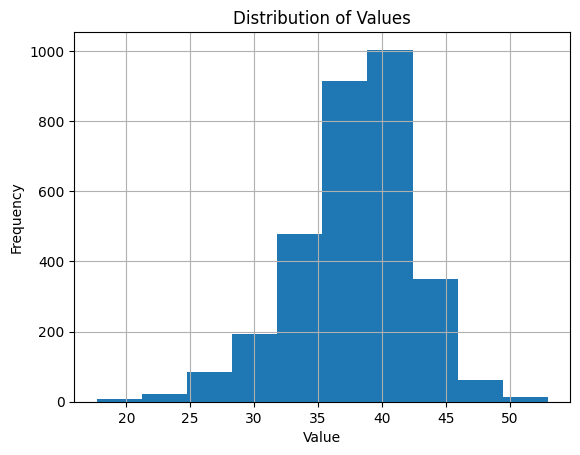

The average obesity rate in 2022 was  37.93151340996169


In [44]:


merged_data_2018['obesity among adults'].hist(bins = 10)
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

print('The average obesity rate in 2022 was ', merged_data_2018['obesity among adults'].mean())

In [45]:
numeric_cols = merged_data.select_dtypes(include='number').columns
annual_means = merged_data.groupby('year')[numeric_cols].mean()

annual_means

,high_threshold_in_state,per_fi_less_or_equal_to_low_threshold,food_insecurity_rate,per_fi_children_hh_income_above_185_fpl,fips,num_of_food_insecure_persons,cost_per_meal,child_food_insecurity_rate,num_of_food_insecure_children,per_fi_children_hh_income_below_185_fpl,...,per_fi_greater_high_threshold,year,estimate_total_households,median_household_income,percent_families_wo_employment,per_hs_grad,per_col_grad,countyfips,diagnosed diabetes among adults,obesity among adults
year,,,,,,,,,,,,,,,,,,,,,
2010,1.875485,0.519954,0.155755,0.334454,30390.411709,14845.507477,2.517636,0.231028,5174.439133,0.664973,...,0.327388,2010.0,39705.574257,63243.684984,18.622740,88.347748,23.453370,30451.242734,11.135867,37.927180
2011,1.875485,0.569478,0.147113,0.287996,30390.411709,14753.617563,2.629997,0.225279,5144.409800,0.711368,...,0.284441,2011.0,39705.574257,63243.684984,18.622740,88.347748,23.453370,30451.242734,11.135867,37.927180
2012,1.878444,0.598326,0.147384,0.283618,30390.411709,14615.501114,2.740000,0.229628,5221.460388,0.716825,...,0.281361,2012.0,39705.574257,63243.684984,18.622740,88.347748,23.453370,30451.242734,11.135867,37.927180
2013,1.881212,0.616956,0.150617,0.263728,30390.411709,14555.065224,2.789949,0.237257,5286.554248,0.737291,...,0.268753,2013.0,39705.574257,63243.684984,18.622740,88.347748,23.453370,30451.242734,11.135867,37.927180
2014,1.881222,0.621550,0.146778,0.283628,30383.688415,14284.293444,2.889994,0.228074,5001.425843,0.717330,...,0.279328,2014.0,39705.574257,63243.684984,18.622740,88.347748,23.453370,30451.242734,11.135867,37.927180
2015,1.881222,0.636306,0.141386,0.269087,30383.649268,13629.188415,2.940048,0.210852,4612.005092,0.731878,...,0.247303,2015.0,39681.679221,63227.227331,18.624130,88.340919,23.442451,30447.207469,11.140760,37.931663
2016,1.881222,0.627851,0.136974,0.277393,30383.649268,13208.819223,2.999933,0.200675,4360.760662,0.723584,...,0.277496,2016.0,39681.679221,63227.227331,18.624130,88.340919,23.442451,30447.207469,11.140760,37.931663
2017,1.886903,0.611338,0.132508,0.292820,30383.649268,12824.306174,3.020035,0.193667,4224.010185,0.708180,...,0.300291,2017.0,39681.679221,63227.227331,18.624130,88.340919,23.442451,30447.207469,11.140760,37.931663
2018,1.886915,0.609734,0.131944,0.259379,30393.003820,12112.486469,3.089968,0.190622,3834.683222,0.741299,...,0.282964,2018.0,39687.226373,63225.602363,18.624361,88.340262,23.440485,30456.609195,11.140709,37.931513


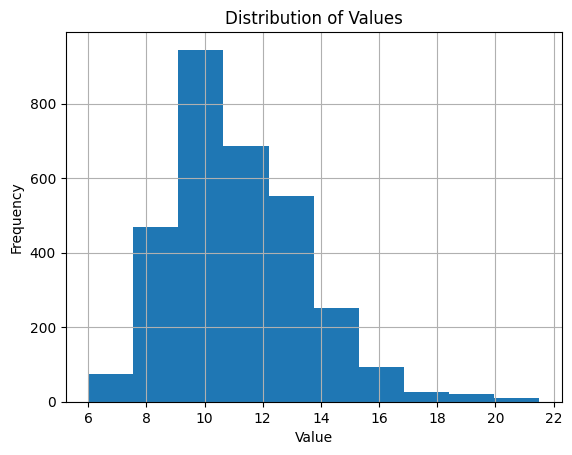

The average diagnosed diabetes rate in 2022 was  11.140708812260538


In [46]:
merged_data_2018['diagnosed diabetes among adults'].hist(bins = 10)
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

print('The average diagnosed diabetes rate in 2022 was ', merged_data_2018['diagnosed diabetes among adults'].mean())

In [47]:
summary = (
    merged_data.groupby("year")["food_insecurity_rate"]
    .agg(
        mean = "mean",
        std="std",
        min="min",
        max="max",
        count="count"
    )
)

summary["range"] = summary["max"] - summary["min"]

print(summary)

          mean       std    min    max  count  range
year                                                
2010  0.155755  0.041837  0.045  0.374   3143  0.329
2011  0.147113  0.042632  0.024  0.352   3143  0.328
2012  0.147384  0.038600  0.039  0.328   3143  0.289
2013  0.150617  0.039252  0.042  0.334   3143  0.292
2014  0.146778  0.041415  0.043  0.375   3142  0.332
2015  0.141386  0.042360  0.034  0.379   3142  0.345
2016  0.136974  0.041853  0.037  0.361   3142  0.324
2017  0.132508  0.039603  0.029  0.363   3142  0.334
2018  0.131944  0.037630  0.036  0.304   3141  0.268
2019  0.131009  0.037171  0.029  0.294   3142  0.265
2020  0.124351  0.037179  0.026  0.287   3143  0.261
2021  0.114678  0.035720  0.022  0.263   3143  0.241
2022  0.144062  0.034725  0.058  0.288   3144  0.230


<Axes: xlabel='year'>

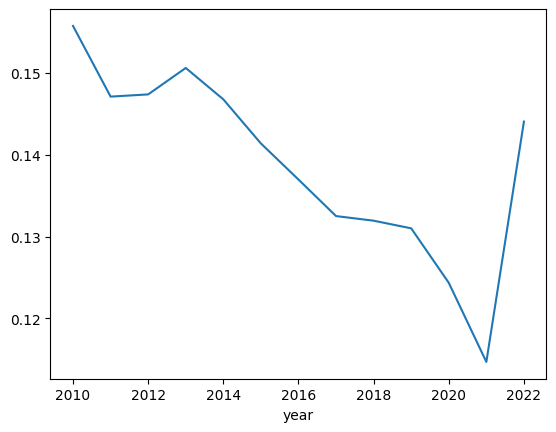

In [48]:
summary["mean"].plot(kind = "line")

In [49]:
census_health_df = merged_data[merged_data["year"] == 2022]

census_health_df = census_health_df[['fips', 'obesity among adults', 'diagnosed diabetes among adults', 'median_household_income', 'percent_families_wo_employment', 'per_col_grad']].drop_duplicates("fips")

census_health_df.notna().sum()

fips                               3144
obesity among adults               3144
diagnosed diabetes among adults    3144
median_household_income            3143
percent_families_wo_employment     3144
per_col_grad                       3144
dtype: int64

In [50]:
fi = merged_data[["fips", "year", "food_insecurity_rate"]]

fi.isna().sum()

fips                    0
year                    0
food_insecurity_rate    0
dtype: int64

In [51]:
#Calculate various measures of change over time

#Overall mean 2010-2022
fi_mean_10_22 = fi.groupby("fips")["food_insecurity_rate"].mean().rename("fi_mean_10_22")

#Recent/Short-term exposure mean 2020-2022
fi_short = fi[fi["year"] >= 2020].groupby("fips")["food_insecurity_rate"].mean().rename("fi_short")

#Medium-term exposure mean
fi_medium = fi[fi["year"].isin([2015, 2016, 2017, 2018, 2019])].groupby("fips")["food_insecurity_rate"].mean().rename("fi_medium")

#Long-term exposure mean
fi_long = fi[fi["year"].isin([2010, 2011, 2012, 2013, 2014])].groupby("fips")["food_insecurity_rate"].mean().rename("fi_long")

#Food insecurity volatility - how much is a county's food insecurity rate fluctuating
fi_volatility_10_22 = fi.groupby("fips")["food_insecurity_rate"].std().rename("fi_volatility_10_22")

#Crude change between 2010 and 2022
fi_2010 = fi[fi["year"] == 2010].set_index("fips")["food_insecurity_rate"]
fi_2022 = fi[fi["year"] == 2022].set_index("fips")["food_insecurity_rate"]
fi_change_10_22 = (fi_2022 - fi_2010).rename("fi_change_10_22")


def calc_slope(group):
    years = group["year"].values
    fi_values = group["food_insecurity_rate"].values
    slope = np.polyfit(years, fi_values, 1)[0]
    return slope

fi_trend = fi.groupby("fips").apply(calc_slope).rename("fi_trend")


/var/folders/cw/f9qklq2518177kb19y3vjmhr0000gn/T/ipykernel_33419/436048729.py:27: RankWarning: Polyfit may be poorly conditioned
  slope = np.polyfit(years, fi_values, 1)[0]
/var/folders/cw/f9qklq2518177kb19y3vjmhr0000gn/T/ipykernel_33419/436048729.py:27: RankWarning: Polyfit may be poorly conditioned
  slope = np.polyfit(years, fi_values, 1)[0]
/var/folders/cw/f9qklq2518177kb19y3vjmhr0000gn/T/ipykernel_33419/436048729.py:27: RankWarning: Polyfit may be poorly conditioned
  slope = np.polyfit(years, fi_values, 1)[0]
/var/folders/cw/f9qklq2518177kb19y3vjmhr0000gn/T/ipykernel_33419/436048729.py:27: RankWarning: Polyfit may be poorly conditioned
  slope = np.polyfit(years, fi_values, 1)[0]
/var/folders/cw/f9qklq2518177kb19y3vjmhr0000gn/T/ipykernel_33419/436048729.py:27: RankWarning: Polyfit may be poorly conditioned
  slope = np.polyfit(years, fi_values, 1)[0]
/var/folders/cw/f9qklq2518177kb19y3vjmhr0000gn/T/ipykernel_33419/436048729.py:27: RankWarning: Polyfit may be poorly conditioned
 

In [52]:
#Merge all the change measures into one dataframe

fi_features = (
    pd.concat([fi_mean_10_22, fi_short, fi_medium, fi_long, fi_volatility_10_22, fi_change_10_22, fi_trend], axis=1)
      .reset_index()
)

In [53]:
#Merge change measures with health and census data
final_df = fi_features.merge(census_health_df, on="fips", how="inner")
final_df

,fips,fi_mean_10_22,fi_short,fi_medium,fi_long,fi_volatility_10_22,fi_change_10_22,fi_trend,obesity among adults,diagnosed diabetes among adults,median_household_income,percent_families_wo_employment,per_col_grad
0,1001,0.139917,0.143000,0.1405,0.1376,0.007856,0.017,0.000933,38.4,11.3,68315.0,17.9,29.6
1,1003,0.130538,0.130333,0.1264,0.1348,0.008847,0.015,-0.000319,36.8,10.2,71039.0,20.3,32.6
2,1005,0.216923,0.187667,0.2224,0.2290,0.018590,-0.042,-0.004011,43.8,16.0,39712.0,26.2,11.9
3,1007,0.159615,0.168000,0.1552,0.1590,0.011362,0.034,0.000868,41.4,13.3,50669.0,22.5,10.9
4,1009,0.128308,0.149667,0.1222,0.1216,0.017974,0.048,0.002978,37.3,11.6,57440.0,20.1,14.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,56037,0.113692,0.126000,0.1108,0.1092,0.011131,0.037,0.001692,36.3,9.4,79375.0,12.8,20.0
3140,56039,0.106923,0.095333,0.0966,0.1242,0.016044,-0.011,-0.003313,22.2,7.1,108279.0,12.1,60.3
3141,56041,0.124615,0.115333,0.1312,0.1236,0.010308,0.004,-0.000302,35.5,9.0,78164.0,13.3,19.1
3142,56043,0.116615,0.110333,0.1174,0.1196,0.010421,0.024,-0.000390,39.1,9.4,61875.0,12.5,21.1


In [54]:
# Count of missing values per column
print(final_df.isna().sum())

fips                                0
fi_mean_10_22                       0
fi_short                            0
fi_medium                          11
fi_long                            13
fi_volatility_10_22                 9
fi_change_10_22                    13
fi_trend                            0
obesity among adults                0
diagnosed diabetes among adults     0
median_household_income             1
percent_families_wo_employment      0
per_col_grad                        0
dtype: int64


In [55]:
rows_with_na = final_df[final_df['fi_medium'].isna()]

rows_with_na

,fips,fi_mean_10_22,fi_short,fi_medium,fi_long,fi_volatility_10_22,fi_change_10_22,fi_trend,obesity among adults,diagnosed diabetes among adults,median_household_income,percent_families_wo_employment,per_col_grad
72,2063,0.095333,0.095333,NaN,NaN,0.013317,NaN,0.009000,30.4,7.8,83068.0,10.1,31.5
73,2066,0.136000,0.136000,NaN,NaN,0.026153,NaN,0.024000,32.6,8.9,70606.0,18.5,28.1
309,9110,0.131000,0.131000,NaN,NaN,NaN,NaN,0.000032,32.4,9.4,88190.0,13.2,41.1
310,9120,0.150000,0.150000,NaN,NaN,NaN,NaN,0.000037,28.7,9.0,83147.0,10.6,41.7
311,9130,0.102000,0.102000,NaN,NaN,NaN,NaN,0.000025,31.2,7.7,99742.0,13.6,45.3
312,9140,0.136000,0.136000,NaN,NaN,NaN,NaN,0.000034,30.9,8.9,82939.0,13.3,33.3
313,9150,0.127000,0.127000,NaN,NaN,NaN,NaN,0.000031,32.8,8.4,83119.0,15.4,25.0
314,9160,0.127000,0.127000,NaN,NaN,NaN,NaN,0.000031,30.6,8.2,87971.0,14.4,37.9
315,9170,0.135000,0.135000,NaN,NaN,NaN,NaN,0.000033,32.0,9.6,83617.0,13.0,40.4
316,9180,0.134000,0.134000,NaN,NaN,NaN,NaN,0.000033,33.4,9.1,80330.0,16.2,33.8


In [56]:
#Need to impute rows with NaN, these were rows where CT is missing due to change from counties to planning regions
# missing_med = final_df['fi_medium'].isna()
# missing_long = final_df['fi_long'].isna()
# missing_vol = final_df['fi_volatility_10_22'].isna()
# missing_change = final_df['fi_change_10_22'].isna()
# missing_income = final_df['median_household_income'].isna()

In [57]:
#Removing NAs for initial analyses
final_df = final_df.dropna()

correlation_matrix = final_df.corr()
correlation_matrix

,fips,fi_mean_10_22,fi_short,fi_medium,fi_long,fi_volatility_10_22,fi_change_10_22,fi_trend,obesity among adults,diagnosed diabetes among adults,median_household_income,percent_families_wo_employment,per_col_grad
fips,1.000000,-0.136412,-0.070016,-0.135056,-0.157511,-0.088279,0.121827,0.127350,0.059692,0.013446,0.055645,-0.030674,0.041327
fi_mean_10_22,-0.136412,1.000000,0.878755,0.986029,0.964439,0.437940,-0.314326,-0.262028,0.470893,0.733219,-0.687724,0.464391,-0.429090
fi_short,-0.070016,0.878755,1.000000,0.847363,0.744663,0.185411,0.114105,0.199259,0.477739,0.728589,-0.718824,0.519507,-0.522077
fi_medium,-0.135056,0.986029,0.847363,1.000000,0.934847,0.379620,-0.290997,-0.239164,0.478232,0.695890,-0.682191,0.460501,-0.416877
fi_long,-0.157511,0.964439,0.744663,0.934847,1.000000,0.577663,-0.528302,-0.498924,0.407026,0.688046,-0.598628,0.386262,-0.342728
fi_volatility_10_22,-0.088279,0.437940,0.185411,0.379620,0.577663,1.000000,-0.627599,-0.644518,0.178642,0.470283,-0.190781,0.053242,-0.038378
fi_change_10_22,0.121827,-0.314326,0.114105,-0.290997,-0.528302,-0.627599,1.000000,0.942551,0.006890,-0.118376,-0.030282,-0.009604,-0.079178
fi_trend,0.127350,-0.262028,0.199259,-0.239164,-0.498924,-0.644518,0.942551,1.000000,0.037507,-0.081259,-0.070350,0.109012,-0.175694
obesity among adults,0.059692,0.470893,0.477739,0.478232,0.407026,0.178642,0.006890,0.037507,1.000000,0.699370,-0.604003,0.223584,-0.657952
diagnosed diabetes among adults,0.013446,0.733219,0.728589,0.695890,0.688046,0.470283,-0.118376,-0.081259,0.699370,1.000000,-0.592157,0.271465,-0.532712


In [58]:
#Clustering, what types of clusters come out
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(final_df)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Cluster labels:", labels)
print("Cluster centroids:", centroids)

Cluster labels: [0 0 2 ... 3 3 3]
Cluster centroids: [[ 1.97388274e+04  1.21170692e-01  1.08448388e-01  1.16950428e-01
   1.33024480e-01  1.62150621e-02 -1.32937576e-02 -2.58818192e-03
   3.65554468e+01  9.93023256e+00  6.98564296e+04  1.63342717e+01
   2.57347613e+01]
 [ 3.53178401e+04  9.83392452e-02  8.62709751e-02  9.24775510e-02
   1.11441901e-01  1.61517445e-02 -1.60292350e-02 -2.84197822e-03
   3.25289116e+01  9.24727891e+00  9.93630748e+04  1.29486395e+01
   3.99006803e+01]
 [ 1.85094824e+04  1.66565882e-01  1.53847843e-01  1.63890353e-01
   1.76872235e-01  1.89327147e-02 -1.25600000e-02 -2.33571429e-03
   4.01982353e+01  1.23325882e+01  4.95649518e+04  2.19195294e+01
   1.80015294e+01]
 [ 4.53818760e+04  1.41067513e-01  1.32400912e-01  1.36584089e-01
   1.50750898e-01  1.71821394e-02 -9.00513259e-03 -1.99892836e-03
   3.85967494e+01  1.15846878e+01  5.94842412e+04  1.92679213e+01
   2.17066724e+01]]


In [59]:
centroids_df = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=final_df.columns  # or the list of feature names
)
centroids_df

#Clusters with both food insecurity and health and census data

,fips,fi_mean_10_22,fi_short,fi_medium,fi_long,fi_volatility_10_22,fi_change_10_22,fi_trend,obesity among adults,diagnosed diabetes among adults,median_household_income,percent_families_wo_employment,per_col_grad
0,19738.827417,0.121171,0.108448,0.116950,0.133024,0.016215,-0.013294,-0.002588,36.555447,9.930233,69856.429621,16.334272,25.734761
1,35317.840136,0.098339,0.086271,0.092478,0.111442,0.016152,-0.016029,-0.002842,32.528912,9.247279,99363.074830,12.948639,39.900680
2,18509.482353,0.166566,0.153848,0.163890,0.176872,0.018933,-0.012560,-0.002336,40.198235,12.332588,49564.951765,21.919529,18.001529
3,45381.875962,0.141068,0.132401,0.136584,0.150751,0.017182,-0.009005,-0.001999,38.596749,11.584688,59484.241232,19.267921,21.706672


In [60]:
#Make clusters based on food insecurity data only
fi_measures = [
    'fi_mean_10_22',
    'fi_short',
    'fi_medium',
    'fi_long',
    'fi_volatility_10_22',
    'fi_change_10_22',
    'fi_trend'
]

X = final_df[fi_measures]

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

centroids_df_fi = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=fi_measures  # or the list of feature names
)
centroids_df_fi



,fi_mean_10_22,fi_short,fi_medium,fi_long,fi_volatility_10_22,fi_change_10_22,fi_trend
0,0.165014,0.161262,0.161387,0.170894,0.016198,0.000613,-0.000978
1,0.095606,0.086709,0.091423,0.105128,0.014255,-0.005367,-0.001954
2,0.207943,0.167612,0.206172,0.233913,0.032938,-0.063677,-0.007069
3,0.131234,0.120195,0.126434,0.142658,0.016392,-0.012494,-0.002410


In [61]:
final_df['fi_cluster'] = labels

cluster_profile = final_df.groupby('fi_cluster').mean(numeric_only=True)
cluster_profile

/var/folders/cw/f9qklq2518177kb19y3vjmhr0000gn/T/ipykernel_33419/149488223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['fi_cluster'] = labels


,fips,fi_mean_10_22,fi_short,fi_medium,fi_long,fi_volatility_10_22,fi_change_10_22,fi_trend,obesity among adults,diagnosed diabetes among adults,median_household_income,percent_families_wo_employment,per_col_grad
fi_cluster,,,,,,,,,,,,,
0,30583.304398,0.165014,0.161262,0.161387,0.170894,0.016198,0.000613,-0.000978,39.700347,12.492477,52369.156250,21.753009,18.617245
1,32525.868938,0.095606,0.086709,0.091423,0.105128,0.014255,-0.005367,-0.001954,35.901835,9.285059,78375.246396,14.789777,28.977982
2,24329.964539,0.207943,0.167612,0.206172,0.233913,0.032938,-0.063677,-0.007069,42.867730,14.674823,45689.985816,22.411702,17.257447
3,30460.505324,0.131234,0.120195,0.126434,0.142658,0.016392,-0.012494,-0.002410,36.801392,10.516462,65537.177723,17.943079,24.873382
